<a href="https://colab.research.google.com/github/thaisflopes/demanda_viagens_bicicleta_BIXI_Montreal/blob/main/tcc_parte_1_tratamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Código do trabalho de conclusão de curso
### Parte 1 - Tratamento dos dados

Código desenvolvido para o trabalho de conclusão *Comparando métodos de aprendizado de máquina para previsão da demanda de viagens de bicicletas da BIXI Montreal e análise do efeito da pandemia de COVID-19 na demanda de 2020*, elaborado por Thaís Lopes (https://github.com/thaisflopes) em novembro de 2021.

Link para acessar o trabalho completo: https://repositorio.uniceub.br/jspui/handle/prefix/15956


## Baixando as bases de dados

In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import seaborn as sns

In [ ]:
#Carregando as bases de dados - 2019
df_2019_4 = pd.read_csv("OD_2019-04.csv")
df_2019_5 = pd.read_csv("OD_2019-05.csv")
df_2019_6 = pd.read_csv("OD_2019-06.csv")
df_2019_7 = pd.read_csv("OD_2019-07.csv")
df_2019_8 = pd.read_csv("OD_2019-08.csv")
df_2019_9 = pd.read_csv("OD_2019-09.csv")
df_2019_10 = pd.read_csv("OD_2019-10.csv")

df_2019 = pd.concat([df_2019_4, df_2019_5, df_2019_6, df_2019_7, df_2019_8, df_2019_9, df_2019_10])
df_2019.shape

C:\Users\gusta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.



(5597845, 6)

In [ ]:
#Carregando as bases de dados - 2020
df_2020 = pd.read_csv("OD_2020.csv")
df_2020.shape

(3264741, 6)

In [ ]:
#Juntando as bases de dados
dados = pd.concat([df_2019, df_2020])
dados.shape

(8862586, 6)

## Tratando os dados

In [ ]:
#Tratando as colunas de datas
dados['start_date'] = pd.to_datetime(dados['start_date'], format = '%Y/%m/%d %H:%M:%S')
dados.dtypes

start_date            datetime64[ns]
start_station_code            object
end_date                      object
end_station_code              object
duration_sec                   int64
is_member                      int64
dtype: object

In [ ]:
#Indexando a coluna start_date
dados.set_index('start_date', inplace=True)
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member
start_date,,,,,
2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1
2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1
2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1
2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1
2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0


In [ ]:
#Identificando as viagens da mesma semana
dados['semana'] = dados.index.to_period('W').start_time
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member,semana
start_date,,,,,,
2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1,2019-04-08
2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1,2019-04-08
2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1,2019-04-08
2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1,2019-04-08
2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0,2019-04-08


In [ ]:
#Filtrando só o ano da coluna semana
dados['ano']=dados['semana'].dt.year
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member,semana,ano
start_date,,,,,,,
2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1,2019-04-08,2019
2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1,2019-04-08,2019
2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1,2019-04-08,2019
2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1,2019-04-08,2019
2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0,2019-04-08,2019


In [ ]:
#Filtrando só o mês da coluna semana
dados['mes']=dados['semana'].dt.month
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member,semana,ano,mes
start_date,,,,,,,,
2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1,2019-04-08,2019,4
2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1,2019-04-08,2019,4
2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1,2019-04-08,2019,4
2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1,2019-04-08,2019,4
2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0,2019-04-08,2019,4


In [ ]:
#Estabelecendo as combinações de 'semana,inicio,fim,membro'
dados['semana,inicio,fim,membro'] = dados.apply(lambda x:'%s,%s,%s,%s' % (x['semana'], x['start_station_code'],x['end_station_code'],x['is_member']),axis=1)
dados['semana,inicio,fim,membro'] = dados['semana,inicio,fim,membro'].astype(object)
dados.dtypes

start_station_code                  object
end_date                            object
end_station_code                    object
duration_sec                         int64
is_member                            int64
semana                      datetime64[ns]
ano                                  int64
mes                                  int64
semana,inicio,fim,membro            object
dtype: object

In [ ]:
#Calculando a quantidade total de viagens por 'semana,inicio,fim,membro'
dados['qtd_viagens'] = dados.groupby('semana,inicio,fim,membro')['semana,inicio,fim,membro'].transform('count')
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
start_date,,,,,,,,,,
2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6001,6132,1",1
2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6411,6411,1",1
2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6097,6036,1",1
2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6310,6345,1",1
2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0,2019-04-08,2019,4,"2019-04-08 00:00:00,7029,6250,0",1


In [ ]:
#Retirando start_date do index
dados.reset_index(drop=True, inplace=True)
dados.head()

,start_station_code,end_date,end_station_code,duration_sec,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
0,6001,2019-04-14 08:07:16,6132,713,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6001,6132,1",1
1,6411,2019-04-14 08:09:18,6411,587,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6411,6411,1",1
2,6097,2019-04-14 08:12:11,6036,736,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6097,6036,1",1
3,6310,2019-04-14 08:27:58,6345,1680,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6310,6345,1",1
4,7029,2019-04-14 08:14:12,6250,814,0,2019-04-08,2019,4,"2019-04-08 00:00:00,7029,6250,0",1


In [ ]:
#Retirando colunas que não serão usadas
dados = dados.drop(labels=['end_date', 'duration_sec'], axis = 1)
dados.head()

,start_station_code,end_station_code,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
0,6001,6132,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6001,6132,1",1
1,6411,6411,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6411,6411,1",1
2,6097,6036,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6097,6036,1",1
3,6310,6345,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6310,6345,1",1
4,7029,6250,0,2019-04-08,2019,4,"2019-04-08 00:00:00,7029,6250,0",1


In [ ]:
#Retirando linhas duplicadas
dados = dados.drop_duplicates()
dados

,start_station_code,end_station_code,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
0,6001,6132,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6001,6132,1",1
1,6411,6411,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6411,6411,1",1
2,6097,6036,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6097,6036,1",1
3,6310,6345,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6310,6345,1",1
4,7029,6250,0,2019-04-08,2019,4,"2019-04-08 00:00:00,7029,6250,0",1
...,...,...,...,...,...,...,...,...
8862581,7073,6209,1,2020-11-16,2020,11,"2020-11-16 00:00:00,7073,6209,1",1
8862582,6154,7035,1,2020-11-16,2020,11,"2020-11-16 00:00:00,6154,7035,1",1
8862583,6108,6017,1,2020-11-16,2020,11,"2020-11-16 00:00:00,6108,6017,1",1
8862584,6104,6119,1,2020-11-16,2020,11,"2020-11-16 00:00:00,6104,6119,1",1


### Tratando dados categóricos

Na base de dados de 2019, tem um código de estação que está como 'MTL-ECO5.1-01'. Esse termo foi consultado na base de códigos das estações disponibilizado pela BIXI Montreal, como não foi localizado, acredita-se ser um erro de registro. Devido a isso e por existir apenas 3 registros, as linhas com essa estação foram excluídas.

In [ ]:
#Qtd de linhas antes
dados.shape

(4035255, 8)

In [ ]:
#Selecionando as linhas com 'MTL-ECO5.1-01'
cat = dados.loc[(dados['start_station_code'] == 'MTL-ECO5.1-01')]
cat

,start_station_code,end_station_code,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
3788059,MTL-ECO5.1-01,MTL-ECO5.1-01,1,2019-08-19,2019,8,"2019-08-19 00:00:00,MTL-ECO5.1-01,MTL-ECO5.1-01,1",3


In [ ]:
#Removendo linhas da base principal
dados = dados.drop(cat.index)
dados.head()

,start_station_code,end_station_code,is_member,semana,ano,mes,"semana,inicio,fim,membro",qtd_viagens
0,6001,6132,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6001,6132,1",1
1,6411,6411,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6411,6411,1",1
2,6097,6036,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6097,6036,1",1
3,6310,6345,1,2019-04-08,2019,4,"2019-04-08 00:00:00,6310,6345,1",1
4,7029,6250,0,2019-04-08,2019,4,"2019-04-08 00:00:00,7029,6250,0",1


In [ ]:
#Qtd de linhas depois
dados.shape

(4035254, 8)

### Separando as bases de 2019 e 2020

#### Base de 2019:

In [ ]:
#Filtrando os dados de 2019 - será utilizado para treinar e testar os modelos
dados_2019 = dados.loc[dados['ano']==2019]
dados_2019 = pd.DataFrame(dados_2019)
dados_2019.shape

(2330820, 8)

In [ ]:
#Alterando o tipo de dado da semana de data para objeto para conseguir contar a frequência
dados_2019['n_semana'] = dados_2019['semana'].astype(object)
dados_2019.dtypes

start_station_code                  object
end_station_code                    object
is_member                            int64
semana                      datetime64[ns]
ano                                  int64
mes                                  int64
semana,inicio,fim,membro            object
qtd_viagens                          int64
n_semana                            object
dtype: object

In [ ]:
#Substituindo as datas da coluna semana por uma sequência numérica
semanas_2019 = dados_2019['n_semana'].unique()
total_semanas_2019 = len(semanas_2019)
mapeamento_semanas_2019 = dict(zip(semanas_2019, range(total_semanas_2019)))
dados_2019['n_semana'] = dados_2019['n_semana'].replace(mapeamento_semanas_2019)

In [ ]:
dados_2019['qtd_viagens'].sum()

5745955

A soma da quantidade de viagens era para ser 5597842 (qtd de linhas da base inicial de 2019). Assim, o .drop_duplicates foi aplicado novamente na coluna 'semana,inicio,fim,membro'.

In [ ]:
dados_2019 = dados_2019.drop_duplicates(subset='semana,inicio,fim,membro', keep="last")
dados_2019['qtd_viagens'].sum()

5597842

#### Base de 2020:

In [ ]:
#Filtrando os dados de 2020 - será utilizado para prever a demanda de 2020
dados_2020 = dados.loc[dados['ano']==2020]
dados_2020 = pd.DataFrame(dados_2020)
dados_2020.shape

(1704434, 8)

In [ ]:
#Alterando o tipo de dado da semana de data para objeto para conseguir contar a frequência
dados_2020['n_semana'] = dados_2020['semana'].astype(object)
dados_2020.dtypes

start_station_code                  object
end_station_code                    object
is_member                            int64
semana                      datetime64[ns]
ano                                  int64
mes                                  int64
semana,inicio,fim,membro            object
qtd_viagens                          int64
n_semana                            object
dtype: object

In [ ]:
#Substituindo as datas da coluna semana por uma sequência numérica
semanas_2020 = dados_2020['n_semana'].unique()
total_semanas_2020 = len(semanas_2020)
mapeamento_semanas_2020 = dict(zip(semanas_2020, range(total_semanas_2020)))
dados_2020['n_semana'] = dados_2020['n_semana'].replace(mapeamento_semanas_2020)

In [ ]:
dados_2020['qtd_viagens'].sum()

3264741

#### Salvando bases em csv

In [ ]:
dados.to_csv('dados.csv')
dados_2019.to_csv('dados_2019.csv')
dados_2020.to_csv('dados_2020.csv')

## Visualizando os dados

In [ ]:
dados = pd.concat([dados_2019, dados_2020])

In [ ]:
#Calculando a quantidade total de viagens por ano
viagens_por_ano = dados.groupby(['ano'])['qtd_viagens'].sum()
viagens_por_ano = pd.DataFrame(viagens_por_ano)
viagens_por_ano = viagens_por_ano.reset_index()
viagens_por_ano

,ano,qtd_viagens
0,2019,5597842
1,2020,3264741


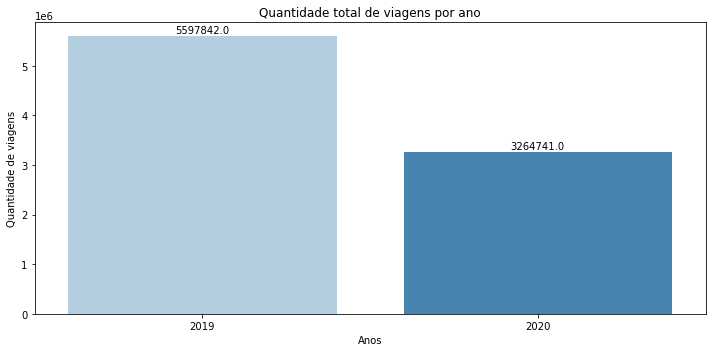

In [ ]:
#Gráfico da quantidade total de viagens por ano

#Criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,5))

#Criando o gráfico de barras 
ax = sns.barplot(x=viagens_por_ano['ano'], y=viagens_por_ano['qtd_viagens'], ax=ax, data=viagens_por_ano, palette="Blues")

#Criando o layout
ax.set_title('Quantidade total de viagens por ano')
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade de viagens')

#Criando os rótulos dos dados
for i in ax.patches:
    h = i.get_height()
    ax.annotate('{}'.format(h), xy = (i.get_x()+i.get_width()/2, h), xytext = (0,3), textcoords = 'offset points', ha = 'center')

#Otimizando espaço da figure
fig.tight_layout();

In [ ]:
#Calculando a quantidade total de viagens por ano e membro
viagens_por_ano_membro = dados.groupby(['ano', 'is_member'])['qtd_viagens'].sum()
viagens_por_ano_membro = pd.DataFrame(viagens_por_ano_membro)
viagens_por_ano_membro = viagens_por_ano_membro.reset_index()
viagens_por_ano_membro.head()

,ano,is_member,qtd_viagens
0,2019,0,1005062
1,2019,1,4592780
2,2020,0,663772
3,2020,1,2600969


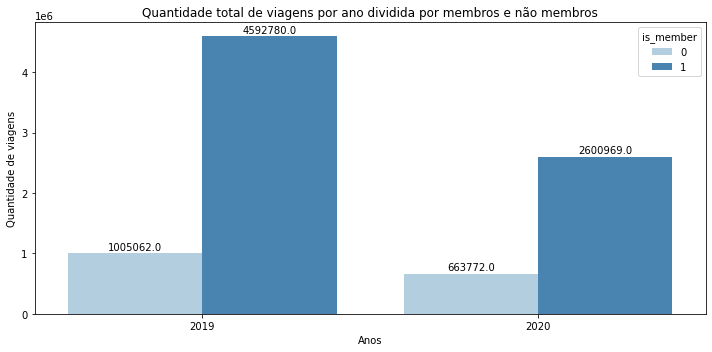

In [ ]:
#Gráfico da quantidade total de viagens por ano e membro

#Criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,5))

#Criando o gráfico de barras 
ax = sns.barplot(x=viagens_por_ano_membro['ano'], y=viagens_por_ano_membro['qtd_viagens'], hue='is_member', ax=ax, data=viagens_por_ano_membro, palette="Blues")

#Criando o layout
ax.set_title('Quantidade total de viagens por ano dividida por membros e não membros')
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade de viagens')

#Criando os rótulos dos dados
for i in ax.patches:
    h = i.get_height()
    ax.annotate('{}'.format(h), xy = (i.get_x()+i.get_width()/2, h), xytext = (0,3), textcoords = 'offset points', ha = 'center')

#Otimizando espaço da figure
fig.tight_layout();

In [ ]:
dados_2019 = pd.read_csv("dados_2019.csv")
dados_2020 = pd.read_csv("dados_2020.csv")

In [ ]:
#Calculando a quantidade total de viagens por semana - 2019
viagens_por_semana_2019 = dados_2019.groupby(['semana'])['qtd_viagens'].sum()
viagens_por_semana_2019 = pd.DataFrame(viagens_por_semana_2019)
viagens_por_semana_2019 = viagens_por_semana_2019.reset_index()
viagens_por_semana_2019

,semana,qtd_viagens
0,2019-04-08,9143
1,2019-04-15,81796
2,2019-04-22,102919
3,2019-04-29,148721
4,2019-05-06,172137
5,2019-05-13,164058
6,2019-05-20,198095
7,2019-05-27,197187
8,2019-06-03,233966
9,2019-06-10,200064


In [ ]:
#Calculando a quantidade total de viagens por semana - 2020
viagens_por_semana_2020 = dados_2020.groupby(['semana'])['qtd_viagens'].sum()
viagens_por_semana_2020 = pd.DataFrame(viagens_por_semana_2020)
viagens_por_semana_2020 = viagens_por_semana_2020.reset_index()
viagens_por_semana_2020

,semana,qtd_viagens
0,2020-04-13,15944
1,2020-04-20,32475
2,2020-04-27,53894
3,2020-05-04,45049
4,2020-05-11,74550
5,2020-05-18,119463
6,2020-05-25,103482
7,2020-06-01,115471
8,2020-06-08,123825
9,2020-06-15,139994


In [ ]:
#Gráfico da quantidade total de viagens por semana

#Criando os gráficos
grafico_2019 = go.Scatter(x = viagens_por_semana_2019['semana'], y = viagens_por_semana_2019['qtd_viagens'], mode = 'markers+lines', name = 'Viagens em 2019')
grafico_2020 = go.Scatter(x = viagens_por_semana_2020['semana'], y = viagens_por_semana_2020['qtd_viagens'], mode = 'markers+lines', name = 'Viagens em 2020')

#Armazenando os gráficos em uma lista
graficos = [grafico_2019, grafico_2020]

#Criando o layout
layout = go.Layout(title='Quantidade total de viagens por semana',
                   yaxis={'title':'Quantidade de viagens'},
                   xaxis={'title': 'Semanas'})

#Criando a figura que será exibida
fig = go.Figure(data=graficos, layout=layout)
fig.update_layout(legend=dict(orientation='h'))

#Exibindo o gráfico
py.iplot(fig)

,is_member,ano,mes,qtd_viagens
is_member,1.000000,-0.017693,0.028501,0.087525
ano,-0.017693,1.000000,0.079937,-0.090397
mes,0.028501,0.079937,1.000000,-0.002971
qtd_viagens,0.087525,-0.090397,-0.002971,1.000000


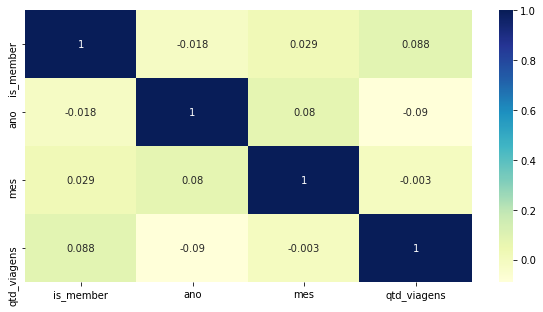

In [ ]:
#Calculando a correlação entre as variáveis
plt.figure(figsize=(10,5))
c= dados.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c